# HLMA408: Anova

***
> __Auteur__: Joseph Salmon
> <joseph.salmon@umontpellier.fr>

## Introduction et présentation

### Import des packages usuels

In [1]:
import platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from download import download
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.api import anova_lm
from scipy.stats import t, f
from ipywidgets import interact, IntSlider, FloatLogSlider  # widget manipulation

### Commande "magique" pour un affichage plus avancé en Jupyter

In [2]:
%matplotlib inline

### Préparation pour l'affichage graphique et sauvegarder les images

In [3]:
# saving tools for the course:
sns.set_context("poster", font_scale=1)
sns.set_style("ticks")
sns.set_palette("colorblind")

# colors
brown = (0.64, 0.16, 0.16)
purple = (148. / 255, 0, 211. / 255)

dirname = "../prebuiltimages/"
imageformat = ".pdf"

## Syndrome Down  et souris génétiquement modifiées

Description des données:

"This  dataset  is  found  from
http://www.stat.berkeley.edu/users/statlabs/labs.html. 
It accompanies the excellent text Stat Labs:  Mathematical Statistics through Applications
Springer-Verlag (2001) by Deborah Nolan and Terry Speed."

Plus de détails:
https://www.stat.berkeley.edu/users/statlabs/papers/sample.pdf
(notamment sur les biais de collectes des données...)


Description des variables:

- DNA:  le fragment d'ADN inséré dans la souris ancêtre 1=141G6, 2=152F7, 3=230E8 et 4=285E6
- line: la lignée, e.g. #50-69-29
- tg:   Transgénique (1= Vrai, 0= faux)
- sex:  Sexe de la souris: 1=mâle, 0=femelle
- age: 	 Âge de la souris (en jours) lors de la  pesée
- weight: 	  Masse de la souris (en grammes), arrondi à 0.1 gramme
- cage: 	  Numéro de la cage dans laquelle la souris habitait 

## Téléchargement et import pour sauvegarder les données

In [4]:
# to use the default values of utils for instance
Eleve = False  # à changer en True pour un étudiant

title_font = {'size': '16'}
axis_font = {'size': '14'}

if not Eleve:
    from matplotlib import rc
    rc('text', usetex=True)
    font = {'family': 'sans-serif'}
    rc('font', **font)
    saving = True
    from download import download
    from utils import my_saving_display
else:
    saving = False

In [5]:
path_target = "./utils.py"
url_shared_files = "http://josephsalmon.eu/enseignement/Montpellier/HLMA408/sharedcode/utils.py"
download(url_shared_files, path_target, replace=False)

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


'./utils.py'

### Téléchargement et import des données

In [6]:
url = "http://josephsalmon.eu/enseignement/datasets/mouse.data"
# url = "http://www.stat.berkeley.edu/users/statlabs/data/mouse.data" # backup url, without header.
path_target = "./mouse.data"
download(url, path_target, replace=False)

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


'./mouse.data'

In [7]:
df_mouse = pd.read_csv("mouse.data", sep='\s+')
df_mouse.tail(n=10)

,DNA,line,tg,sex,age,weight,cage
522,4,#84-35-72,1,0,119,23.3,97
523,4,#84-35-84,1,0,120,25.5,98
524,4,#84-35-85,1,0,120,25.7,98
525,4,#84-35-86,0,0,120,24.8,98
526,4,#84-35-87,0,0,120,26.6,98
527,4,#84-35-88,0,0,120,26.1,98
528,4,#84-35-89,0,0,120,24.4,98
529,4,#84-35-90,1,0,120,26.1,98
530,4,#84-35-91,0,0,120,26.1,98
531,4,#84-35-92,0,0,120,25.4,98


In [8]:
df_mouse['DNA'] = df_mouse['DNA'] * df_mouse['tg']
G = len(df_mouse['DNA'].unique())
list_gene = ['sans trisomie', '141G6', '152F7', '230E8', '285E6']
df_mouse['DNA'] = df_mouse['DNA'].replace(
    [0, 1, 2, 3, 4], list_gene)
df_mouse['sex'] = df_mouse['sex'].replace([1, 0], ['M', 'F'])

df_mouse.rename({'weight': 'Masse (g)', 'sex': 'Sexe', "DNA": "ADN" }, axis=1, inplace=True)

In [9]:
print("Nombre de modalités : {}".format(G))

Nombre de modalités : 5


In [10]:
gp = df_mouse.groupby('Sexe')
df_male_mouse = gp.get_group(name='M')
df_male_mouse.tail()
df_female_mouse = gp.get_group(name='F')
df_female_mouse.tail()

,ADN,line,tg,Sexe,age,Masse (g),cage
527,sans trisomie,#84-35-88,0,F,120,26.1,98
528,sans trisomie,#84-35-89,0,F,120,24.4,98
529,285E6,#84-35-90,1,F,120,26.1,98
530,sans trisomie,#84-35-91,0,F,120,26.1,98
531,sans trisomie,#84-35-92,0,F,120,25.4,98


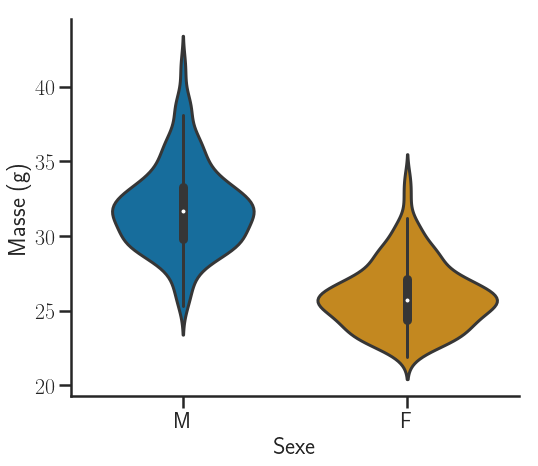

In [11]:
fig = sns.catplot(x='Sexe', y="Masse (g)", data=df_mouse,
            kind='violin', legend_out=False, height=8.5)
fig.fig.set_figwidth(8)
fig.fig.set_figheight(7)
plt.tight_layout()
plt.show()
my_saving_display(fig, dirname,
                  "violin_mouse_by_sex", imageformat, saving=saving)

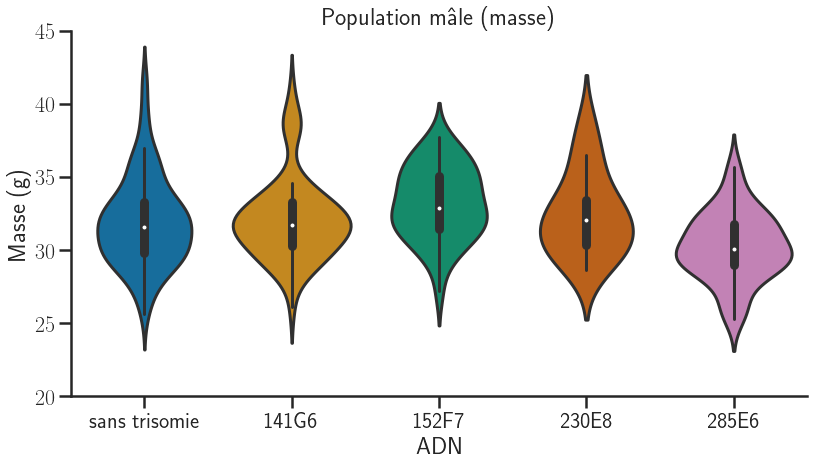

In [12]:
# cf: cmdlinetips.com/2019/03/catplot-in-seaborn-python/
fig = sns.catplot(x='ADN', y="Masse (g)", data=df_male_mouse, kind='violin',
                 legend_out=False, order=list_gene,
                 height=8.5)
fig.fig.set_figwidth(12)
fig.fig.set_figheight(7)
fig.set(ylim=(20, 45))
plt.title('Population mâle (masse)')
plt.tight_layout()
plt.show()
my_saving_display(fig, dirname,
                  "violin_male_mouse_by_gene", imageformat, saving=saving)

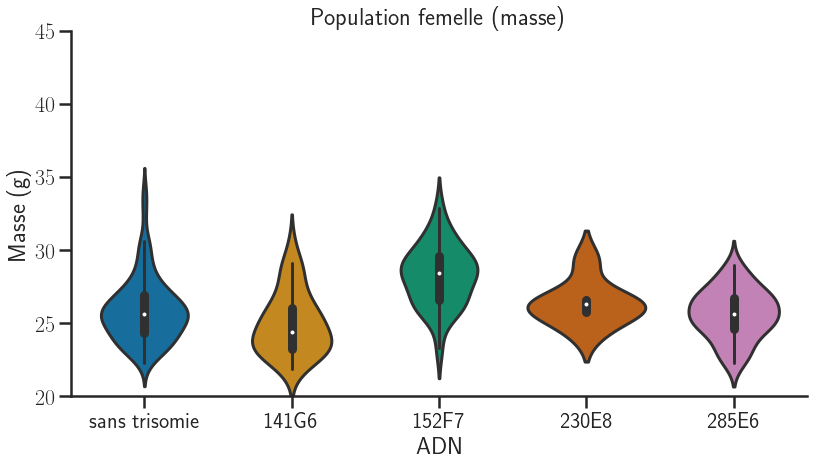

In [13]:
fig = sns.catplot(x='ADN', y="Masse (g)", data=df_female_mouse, kind='violin',
                 legend_out=False, order=list_gene, height=8.5)
fig.fig.set_figwidth(12)
fig.fig.set_figheight(7)
fig.set(ylim=(20, 45))
plt.title('Population femelle (masse)')
plt.tight_layout()
plt.show()
my_saving_display(fig, dirname,
                  "violin_female_mouse_by_gene", imageformat, saving=saving)

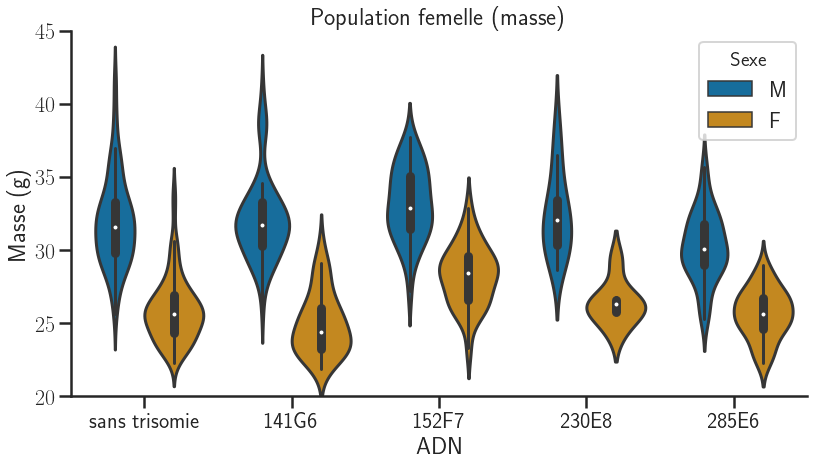

In [14]:
fig = sns.catplot(x='ADN', y="Masse (g)", data=df_mouse, hue="Sexe", kind='violin',
                 legend_out=False, order=list_gene, height=8.5)
fig.fig.set_figwidth(12)
fig.fig.set_figheight(7)
fig.set(ylim=(20, 45))
plt.title('Population femelle (masse)')
plt.tight_layout()
plt.show()
my_saving_display(fig, dirname,
                  "violin_mouse_by_gene", imageformat, saving=saving)

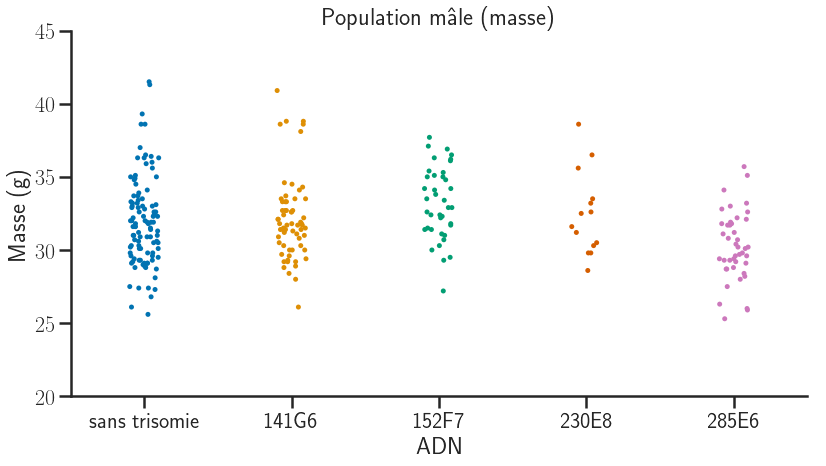

In [15]:
# cf: cmdlinetips.com/2019/03/catplot-in-seaborn-python/
np.random.seed(42)
fig = sns.catplot(x='ADN', y="Masse (g)", data=df_male_mouse, jitter='0.1',
                 legend_out=False, order=list_gene, height=8.5)
fig.fig.set_figwidth(12)
fig.fig.set_figheight(7)
fig.set(ylim=(20, 45))
plt.title('Population mâle (masse)')
plt.tight_layout()
plt.show()
my_saving_display(fig, dirname,
                  "jitter_male_mouse_by_gene", imageformat, saving=saving)

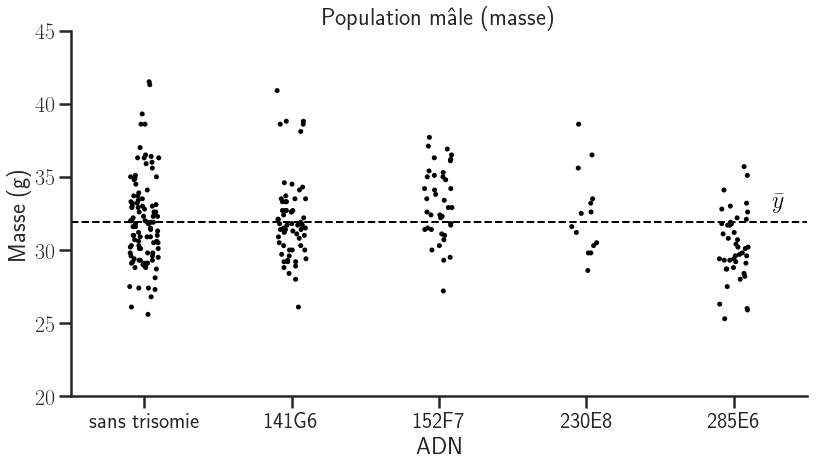

In [16]:
np.random.seed(42)
mean_tot = df_male_mouse['Masse (g)'].mean()
fig = sns.catplot(x='ADN', y="Masse (g)", data=df_male_mouse, jitter='0.1',color='k',
                 legend_out=False, order=list_gene, height=8.5)
fig.fig.set_figwidth(12)
fig.fig.set_figheight(7)
fig.set(ylim=(20, 45))
fig.set(xlim=(-0.5, 4.5))

centers = fig.ax.get_xticks()

# centers = [0.1, 0.3, 0.5, 0.7, 0.9]
centers_axhline = np.linspace(1 / (2 * G), 1-1 / (2 * G), num=G)

plt.axhline(y=mean_tot, xmin=0, xmax=1, ls='--', linewidth=2, color = 'k')
plt.text(centers[4] + 0.35, mean_tot * 1.02, '$\\bar y$', color='k',
         verticalalignment='bottom', horizontalalignment='right')

plt.title('Population mâle (masse)')
plt.tight_layout()
plt.show()
my_saving_display(fig, dirname,
                  "jitter_male_mouse_by_gene_mean", imageformat, saving=saving)

In [17]:
# Calculs des moyennes /effectifs par classes
n_samples = df_male_mouse.groupby('ADN')['Masse (g)'].count()
means = df_male_mouse.groupby('ADN')['Masse (g)'].mean()
sigma2s = df_male_mouse.groupby('ADN')['Masse (g)'].var(ddof=1)

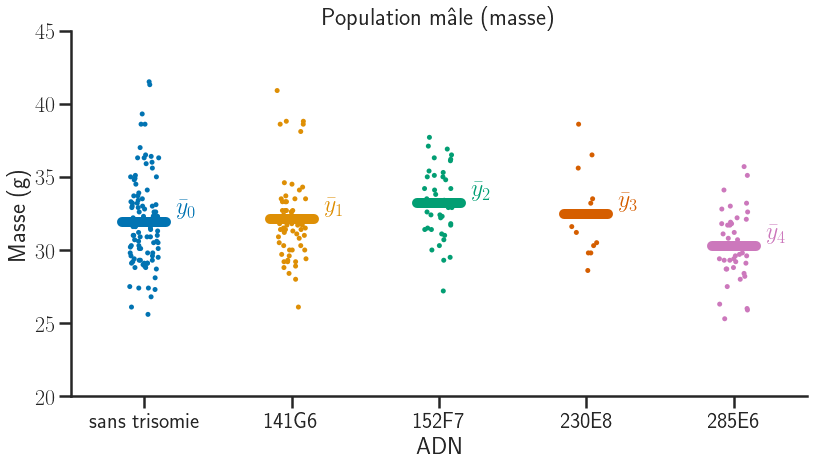

In [18]:
current_palette = sns.color_palette()
np.random.seed(42)
fig = sns.catplot(x='ADN', y="Masse (g)", data=df_male_mouse, jitter='0.1',
                  legend_out=False, order=list_gene, height=8.5)
fig.fig.set_figwidth(12)
fig.fig.set_figheight(7)
fig.set(ylim=(20, 45))
fig.set(xlim=(-0.5, 4.5))
plt.title('Population mâle (masse)')
delta = 0.03

for i, center in enumerate(centers_axhline):
    plt.axhline(y=means[list_gene[i]],
                xmin=center - delta, xmax=center + delta, ls='-', linewidth=10, color=current_palette[i])
    plt.text(i + 0.35, means[list_gene[i]]*0.998, '$\\bar y _{}$'.format(i),
             color=current_palette[i], verticalalignment='bottom', horizontalalignment='right')

plt.tight_layout()

plt.show()

my_saving_display(fig, dirname,
                  "jitter_male_mouse_by_gene_with_means", imageformat, saving=saving)

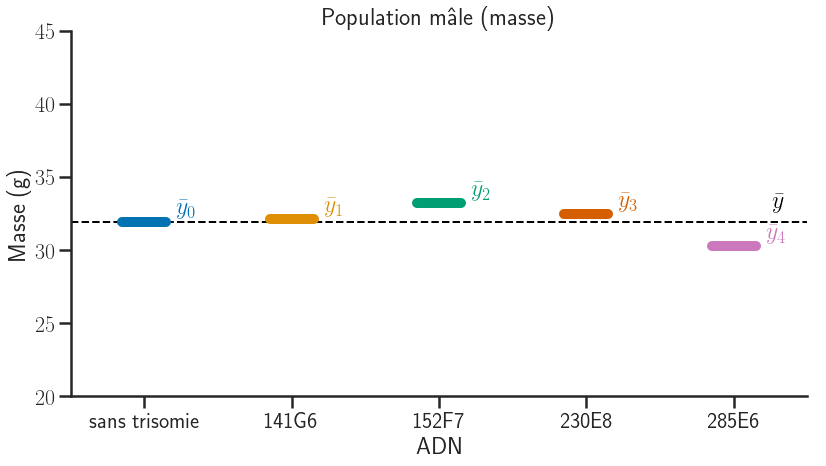

In [19]:
np.random.seed(42)
fig = sns.catplot(x='ADN', y="Masse (g)", data=df_male_mouse, jitter='0.1',
                  legend_out=False, order=list_gene, height=8.5,color='w',alpha=0)
plt.axhline(y=mean_tot, xmin=0, xmax=1, ls='--', linewidth=2, color='k')
plt.text(centers[4] + 0.35, mean_tot * 1.02, '$\\bar y$', color='k',
         verticalalignment='bottom', horizontalalignment='right')
plt.title('Population mâle (masse)')

fig.fig.set_figwidth(12)
fig.fig.set_figheight(7)
fig.set(ylim=(20, 45))
fig.set(xlim=(-0.5, 4.5))

for i, center in enumerate(centers_axhline):
    plt.axhline(y=means[list_gene[i]],
                xmin=center - delta, xmax=center + delta, ls='-', linewidth=10, color=current_palette[i])
    plt.text(i + 0.35, means[list_gene[i]]*0.998, '$\\bar y _{}$'.format(i),
             color=current_palette[i], verticalalignment='bottom', horizontalalignment='right')

plt.tight_layout()

plt.show()

my_saving_display(fig, dirname,
                  "jitter_male_mouse_by_gene_only_means", imageformat, saving=saving)

# Tests

In [20]:
# Pour n'afficher que 3 chiffres après la virgule en Pandas
pd.options.display.float_format = '{:20,.3f}'.format

In [21]:
# Extraction de la base des mâles pour l'ADN et la masse:
df_for_anova = df_male_mouse[["ADN", "Masse (g)"]]
df_for_anova.rename({'Masse (g)': 'Masse'}, axis=1, inplace=True)

/home/jo/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [22]:
df_for_anova

,ADN,Masse
0,230E8,31.600
1,230E8,31.200
2,230E8,28.600
3,sans trisomie,30.100
4,sans trisomie,31.300
5,sans trisomie,36.400
6,230E8,36.500
7,230E8,29.800
8,230E8,35.600
9,230E8,33.500


### Choix de la classe de référence
Pour faire un moindre carré ou un anova avec des variables catégorielles il faut retirer une catégorie qui sera donc la catégorie de référence. Pour forcer cela on peut utiliser:
https://patsy.readthedocs.io/en/latest/API-reference.html#patsy.Treatment

Dans notre cas, il faut enlever la modalité "sans trisomie" ce qui est fait ci-dessous.

**Remarque**: sans cela l'ordre lexicographique (i.e., l'ordre utiliser dans un dictionnaire) est pris en compte et ce serait "141G6" qui serait pris comme classe de référence.

In [23]:
# Ajuster le modèle linéaire (oui l'ANOVA est un modèle linéaire)
formula = "Masse ~ C(ADN, Treatment('sans trisomie'))"
lm = ols(formula, df_for_anova).fit()
table = anova_lm(lm)

## Test de Fisher
On cherche ici à déterminer si la variable "ADN" est explicative pour le poids d'une souris mâle.
Dans ce contexte $\mathcal{H}_0$ correspond à

$"\beta_1^\star=\dots=\beta_{G-1}^\star=0"$

et donc  $\mathcal{H}_0$ correspond à 

$\exists g \in \{0,\dots,G-1\}$ tel que $\beta_g^\star \neq0"$


In [24]:
print(table)

                                                     df               sum_sq  \
C(ADN, Treatment('sans trisomie'))                4.000              191.311   
Residual                                        260.000            2,023.878   

                                                mean_sq                    F  \
C(ADN, Treatment('sans trisomie'))               47.828                6.144   
Residual                                          7.784                  nan   

                                                 PR(>F)  
C(ADN, Treatment('sans trisomie'))                0.000  
Residual                                            nan  


In [25]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Masse   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     6.144
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           9.72e-05
Time:                        16:15:29   Log-Likelihood:                -645.40
No. Observations:                 265   AIC:                             1301.
Df Residuals:                     260   BIC:                             1319.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                      31.9276      0.272    117.262      0.000      31.391      32.464
C(ADN, Treatment('sans trisomie'))[T.141G6]     0.1708      0.442      0.386      0.700      -0.700       1.042
C(ADN, Treatment('sans trisomie'))[T.152F7]     1.2826      0.523      2.452      0.015       0.252       2.313
C(ADN, Treatment('sans trisomie'))[T.230E8]     0.5224      0.794      0.658      0.511      -1.041       2.086
C(ADN, Treatment('sans trisomie'))[T.285E6]    -1.6811      0.505     -3.328      0.001      -2.676      -0.686
==============================================================================
Omnibus:                       24.202   Durbin-Watson:                   1.268
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.526
Skew:                           0.687   Prob(JB):                     3.88e-07
Kurtosis:                       3.885   Cond. No.                         5.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Obtention des statistiques de F-test et des pvaleur associées
(cf. tableaux ci-dessus aussi)

In [26]:
print("F-statitic donné par `anova_lm` : {1} et pvaleur associeé {0}".format(
    table.loc["C(ADN, Treatment('sans trisomie'))", 'PR(>F)'], table.loc["C(ADN, Treatment('sans trisomie'))", 'F']))

F-statitic donné par `anova_lm` : 6.144261517356432 et pvaleur associeé 9.724809563139953e-05


In [27]:
print("F-statitic donné par `lm` : {1} et pvaleur associeé {0}".format(lm.f_pvalue, lm.fvalue))

F-statitic donné par `lm` : 6.144261517356477 et pvaleur associeé 9.724809563138972e-05


In [28]:
# Calcul manuel des F-statistics:
n_tot = n_samples.sum()
print("Nombre d'observations total:{}".format(n_tot))
yhat = lm.predict(df_for_anova)
sigma2_intra = 1/ (G-1) * np.sum((yhat.values - mean_tot)**2)
sigma2_hat = ( 1/ (n_tot - G) * np.sum((yhat - df_for_anova['Masse'])**2))
f_stat = sigma2_intra / sigma2_hat
f_distrib = f(G-1, n_tot-G)
print("F-statistic calcul manuel: {}".format(f_stat))

Nombre d'observations total:265
F-statistic calcul manuel: 6.144261517356465


In [29]:
print(1-f_distrib.cdf(f_stat), f_distrib.sf(f_stat))  # sf = survival function /fonction de survie

9.724809563138592e-05 9.724809563139245e-05


### Conclusion du F-test
compte tenu de la pvalue extrêment faible, on peut rejeter au niveau $\alpha=5\%, 1%$ ou $0.1%$ l'hypothèse ""

## Tests de Student par modalité
On cherche pour chaque $g=1,\dots,G-1$ à tester

$\mathcal{H}_0$ : $"\beta_g^{\star}=0"$

In [30]:
means

ADN
141G6                         32.098
152F7                         33.210
230E8                         32.450
285E6                         30.247
sans trisomie                 31.928
Name: Masse (g), dtype: float64

In [31]:
mean_tot

31.9124528301887

In [32]:
n_samples

ADN
141G6             64
152F7             39
230E8             14
285E6             43
sans trisomie    105
Name: Masse (g), dtype: int64

In [33]:
# Calcul à la main des coefficients
beta_0 = means['sans trisomie']
beta_1 = means['141G6'] - means['sans trisomie']
beta_2 = means['152F7'] - means['sans trisomie']
beta_3 = means['230E8'] - means['sans trisomie']
beta_4 = means['285E6'] - means['sans trisomie']

In [34]:
print("Coefficients:")
print("beta_0", "beta_1", "beta_2", "beta_3", "beta_4")
print("{:.3f},  {:.3f}, {:.3f},  {:.3f},  {:.3f}".format(beta_0, beta_1, beta_2, beta_3, beta_4))

Coefficients:
beta_0 beta_1 beta_2 beta_3 beta_4
31.928,  0.171, 1.283,  0.522,  -1.681


In [35]:
# Vérifications avec le modèle lm:
lm.params

Intercept                                                   31.928
C(ADN, Treatment('sans trisomie'))[T.141G6]                  0.171
C(ADN, Treatment('sans trisomie'))[T.152F7]                  1.283
C(ADN, Treatment('sans trisomie'))[T.230E8]                  0.522
C(ADN, Treatment('sans trisomie'))[T.285E6]                 -1.681
dtype: float64

In [36]:
# Variance par classe:
sigma2s

ADN
141G6                          7.874
152F7                          6.014
230E8                          8.109
285E6                          5.446
sans trisomie                  9.280
Name: Masse (g), dtype: float64

### Valeur de $\hat{\sigma}^2$

In [37]:
# Calcul manuel
hatsigma2 = (1 / (n_tot-5))  * np.sum(sigma2s * (n_samples-1))
hatsigma2

7.7841447026614965

In [38]:
# Vérifications avec le modèle lm:
np.sum(lm.resid ** 2) / (n_tot-G)

7.784144702661493

In [39]:
hatsigma2_beta_0 = hatsigma2 / n_samples['sans trisomie']
hatsigma2_beta_1 = hatsigma2 / n_samples['141G6'] +  hatsigma2_beta_0
hatsigma2_beta_2 = hatsigma2 / n_samples['152F7'] +  hatsigma2_beta_0
hatsigma2_beta_3 = hatsigma2 / n_samples['230E8'] +  hatsigma2_beta_0
hatsigma2_beta_4 = hatsigma2 / n_samples['285E6'] +  hatsigma2_beta_0
# Estimation des variances coefficients
hatsigma2_beta_0, hatsigma2_beta_1, hatsigma2_beta_2, hatsigma2_beta_3, hatsigma2_beta_4 

(0.07413471145391902,
 0.19576197243300492,
 0.27372816536831635,
 0.6301450473583117,
 0.25516133244604683)

### Calcul des T-statistiques et des pvaleurs

#### T-statistiques

In [40]:
lm.tvalues

Intercept                                                  117.262
C(ADN, Treatment('sans trisomie'))[T.141G6]                  0.386
C(ADN, Treatment('sans trisomie'))[T.152F7]                  2.452
C(ADN, Treatment('sans trisomie'))[T.230E8]                  0.658
C(ADN, Treatment('sans trisomie'))[T.285E6]                 -3.328
dtype: float64

In [41]:
print(lm.tvalues["Intercept"],
      lm.tvalues["C(ADN, Treatment('sans trisomie'))[T.141G6]"],
     lm.tvalues["C(ADN, Treatment('sans trisomie'))[T.152F7]"],
     lm.tvalues["C(ADN, Treatment('sans trisomie'))[T.230E8]"],
     lm.tvalues["C(ADN, Treatment('sans trisomie'))[T.285E6]"])

117.26157743626808 0.3860740546929827 2.4515691252105887 0.6580623881464545 -3.328036143952162


In [42]:
# Calcul manuel:
print(list_gene)
print(beta_0 / hatsigma2_beta_0**0.5,
      beta_1 / hatsigma2_beta_1**0.5,
      beta_2 / hatsigma2_beta_2**0.5,
      beta_3 / hatsigma2_beta_3**0.5,
      beta_4 / hatsigma2_beta_4**0.5)

['sans trisomie', '141G6', '152F7', '230E8', '285E6']
117.26157743626808 0.3860740546929837 2.4515691252106087 0.6580623881464894 -3.3280361439521493


#### Pvaleurs

In [43]:
# On peu aussi retrouver plus directement les pvaleurs:
print("Pvaleurs par lm:\n{}".format(lm.pvalues))


print("Pvaleurs manuelles:")
print("beta0:", 2 * min(1-t.cdf(beta_0 / hatsigma2_beta_0**0.5,n_tot - G),
               t.cdf(beta_0 / hatsigma2_beta_0**0.5, n_tot - G)))
print("beta1:", 2 * min(1-t.cdf(beta_1 / hatsigma2_beta_1**0.5,n_tot - G),
               t.cdf(beta_1 / hatsigma2_beta_1**0.5, n_tot - G)))
print("beta2:", 2 * min(1-t.cdf(beta_2 / hatsigma2_beta_2**0.5,n_tot - G),
               t.cdf(beta_2 / hatsigma2_beta_2**0.5, n_tot - G)))
print("beta3:", 2 * min(1-t.cdf(beta_3 / hatsigma2_beta_3**0.5,n_tot - G),
               t.cdf(beta_3 / hatsigma2_beta_3**0.5, n_tot - G)))
print("beta4:", 2 * min(1-t.cdf(beta_4 / hatsigma2_beta_4**0.5,n_tot - G),
               t.cdf(beta_4 / hatsigma2_beta_4**0.5, n_tot - G)))

Pvaleurs par lm:
Intercept                                                    0.000
C(ADN, Treatment('sans trisomie'))[T.141G6]                  0.700
C(ADN, Treatment('sans trisomie'))[T.152F7]                  0.015
C(ADN, Treatment('sans trisomie'))[T.230E8]                  0.511
C(ADN, Treatment('sans trisomie'))[T.285E6]                  0.001
dtype: float64
Pvaleurs manuelles:
beta0: 0.0
beta1: 0.699757553310397
beta2: 0.014882001939680256
beta3: 0.5110802743867762
beta4: 0.0010010407793479357


### Remarque sur le calcul des pvaleur pour les T-tests
La formulation `2 min (t.cdf, 1-t.cdf)` ci-dessus vient de ce que l'on considère un test bilatéral pour chacun des coefficients.

## Conclusion de l'analyse: 
au niveau 5% on accepte l'hypothèse que $\beta^{\star}_1=0$ et $\beta^{\star}_3=0$.
par contre, on rejette cette hypothèse pour $\beta^{\star}_2$ et $\beta^{\star}_4$, on rejette cette hypothèse. Cela signifie donc que l'on accepte l'hypothèse selon qu'il n'y a pas de différences entre le groupe témoin et les groupes `141G6` et `230E8`.
Par contre on peut donc supposer qu'il y a une différence entre les groupes `152F7` et `285E6`.
Enfin on voit que l'ordonnée à l'origine est significativement différente de zéro, mais cette information a peu d'intérêt (on rejette l'hypothèse "le poids des souris `sans trisomie` est nul"!).


#### Autre facon possible de récupérer les T-tests pour un test particulier

In [44]:
T_testlm = lm.t_test(np.eye(G))
print(list_gene)
print("T_statistics:{}".format(T_testlm.statistic))
print("pvaleurs: {:5,.3f},{:5,.3f},{:5,.3f},{:5,.3f},{:5,.3f}".format(
    T_testlm.pvalue[0], T_testlm.pvalue[1], T_testlm.pvalue[2], T_testlm.pvalue[3],
    T_testlm.pvalue[4], T_testlm.pvalue[4]))

['sans trisomie', '141G6', '152F7', '230E8', '285E6']
T_statistics:[117.26157744   0.38607405   2.45156913   0.65806239  -3.32803614]
pvaleurs: 0.000,0.700,0.015,0.511,0.001


## Intervalles de confiance et prédictions
On va visualiser dans la suite des intervalles de prédiction obtenus pour chacune des classes. 

In [45]:
alpha=0.05
print(alpha)
ICS = lm.conf_int(alpha=alpha)
IC = ICS.loc["C(ADN, Treatment('sans trisomie'))[T.141G6]",:]
ICS

0.05


,0,1
Intercept,31.391,32.464
"C(ADN, Treatment('sans trisomie'))[T.141G6]",-0.700,1.042
"C(ADN, Treatment('sans trisomie'))[T.152F7]",0.252,2.313
"C(ADN, Treatment('sans trisomie'))[T.230E8]",-1.041,2.086
"C(ADN, Treatment('sans trisomie'))[T.285E6]",-2.676,-0.686


### <font color='red'> Exercice: calcul d'intervalles de confiance</font>
Reprendre l'analyse du cours pour vérifier la véracité des intervalles de confiance obtenus.


In [46]:
def display_IC(alpha=0.05, saving=saving):
    df_to_predict = pd.DataFrame(list_gene, columns=['ADN'])
    predictions = lm.get_prediction(df_to_predict)
    df_predictions = predictions.summary_frame(alpha=alpha)
    IC_down = df_predictions['mean_ci_lower'].astype(float)
    IC_up = df_predictions['mean_ci_upper'].astype(float)

    np.random.seed(42)
    fig = sns.catplot(x='ADN', y="Masse (g)", data=df_male_mouse, jitter='0.1',
                      legend_out=False, order=list_gene, height=8.5)

    ax = fig.ax
    plt.axhline(y=means[list_gene[0]], xmin=0, xmax=1,
                ls='--', linewidth=2, color=current_palette[0])

    fig.fig.set_figwidth(12)
    fig.fig.set_figheight(7)
    fig.set(ylim=(20, 45))
    fig.set(xlim=(-0.5, 4.5))

    plt.title('Population mâle (masse) et IC')

    for i, center in enumerate(centers_axhline):
        plt.plot([centers[i] - delta*5, centers[i] + delta*5],
                 [IC_down[i], IC_down[i]],
                 color=current_palette[i], linewidth=1)
        plt.plot([centers[i] - delta*5, centers[i] + delta*5],
                 [IC_up[i], IC_up[i]],
                 color=current_palette[i], linewidth=1)
        plt.fill_between([centers[i] - delta*5, centers[i] + delta*5],
                         [IC_down[i], IC_down[i]],
                         [IC_up[i], IC_up[i]], facecolor=current_palette[i], alpha=.25)
        plt.axhline(y=means[list_gene[i]],
                    xmin=center - delta, xmax=center + delta, ls='-', linewidth=10, color=current_palette[i])
        plt.text(i + 0.35, means[list_gene[i]]*0.998, '$\\bar y _{}$'.format(i),
                 color=current_palette[i], verticalalignment='bottom', horizontalalignment='right')

    plt.tight_layout()
    plt.show()

    my_saving_display(fig, dirname,
                      "jitter_male_mouse_by_gene_only_ICs", imageformat, saving=saving)

In [47]:
interact(display_IC,
         alpha=FloatLogSlider(value=0.05, description='$\\alpha$', max=-1, min=-10.0, step=0.2)
         );

interactive(children=(FloatLogSlider(value=0.05, description='$\\alpha$', max=-1.0, min=-10.0, step=0.2), Chec…